In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Datos/Mental_Health_Lifestyle_Dataset.csv")
df

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Japan,57,Female,Moderate,Balanced,7.0,High,Depression,29,4.4,9.7,5.9
2996,Australia,27,Male,Low,Junk Food,7.1,Low,NaN,47,7.4,6.3,9.9
2997,Australia,42,Male,Moderate,Balanced,6.0,High,Depression,23,3.9,5.2,4.1
2998,Australia,25,Male,High,Keto,5.7,Low,Anxiety,51,4.3,5.9,4.1


In [3]:
stress_mapping = {'Low': 0, 'Moderate': 0.5, 'High': 1}
exercise_mapping = {'Low': 0, 'Moderate': 0.5, 'High': 1}

# Aplicamos los mapeos
df['Stress Level'] = df['Stress Level'].map(stress_mapping)
df['Exercise Level'] = df['Exercise Level'].map(exercise_mapping)

df

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,0.0,Vegetarian,6.3,0.0,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,0.5,Vegan,4.9,0.0,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,0.0,Vegetarian,7.2,1.0,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,0.0,Vegan,7.2,0.0,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,0.0,Balanced,7.3,0.0,Anxiety,35,3.6,4.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Japan,57,Female,0.5,Balanced,7.0,1.0,Depression,29,4.4,9.7,5.9
2996,Australia,27,Male,0.0,Junk Food,7.1,0.0,NaN,47,7.4,6.3,9.9
2997,Australia,42,Male,0.5,Balanced,6.0,1.0,Depression,23,3.9,5.2,4.1
2998,Australia,25,Male,1.0,Keto,5.7,0.0,Anxiety,51,4.3,5.9,4.1


In [4]:
 #Eliminamos la columna Gender y creamos columnas binarias para cada género
df["Male"] = (df["Gender"] == "Male").astype(int)
df["Female"] = (df["Gender"] == "Female").astype(int)
df["Other"] = (df["Gender"] == "Other").astype(int)
# Eliminamos la columna original de Gender
df = df.drop("Gender", axis=1)

df.head()

,Country,Age,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,Other
0,Brazil,48,0.0,Vegetarian,6.3,0.0,NaN,21,4.0,7.8,6.5,1,0,0
1,Australia,31,0.5,Vegan,4.9,0.0,PTSD,48,5.2,8.2,6.8,1,0,0
2,Japan,37,0.0,Vegetarian,7.2,1.0,NaN,43,4.7,9.6,9.7,0,1,0
3,Brazil,35,0.0,Vegan,7.2,0.0,Depression,43,2.2,8.2,6.6,1,0,0
4,Germany,46,0.0,Balanced,7.3,0.0,Anxiety,35,3.6,4.7,4.4,1,0,0


In [5]:
df["Vegetarian"] = (df["Diet Type"] == "Vegetarian").astype(int)
df["Vegan"] = (df["Diet Type"] == "Vegan").astype(int)
df["Balanced"] = (df["Diet Type"] == "Balanced").astype(int)
df["Keto"] = (df["Diet Type"] == "Keto").astype(int)
df["Junk Food"] = (df["Diet Type"] == "Junk Food").astype(int)
df = df.drop("Diet Type", axis=1)

df.head()

,Country,Age,Exercise Level,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,Other,Vegetarian,Vegan,Balanced,Keto,Junk Food
0,Brazil,48,0.0,6.3,0.0,NaN,21,4.0,7.8,6.5,1,0,0,1,0,0,0,0
1,Australia,31,0.5,4.9,0.0,PTSD,48,5.2,8.2,6.8,1,0,0,0,1,0,0,0
2,Japan,37,0.0,7.2,1.0,NaN,43,4.7,9.6,9.7,0,1,0,1,0,0,0,0
3,Brazil,35,0.0,7.2,0.0,Depression,43,2.2,8.2,6.6,1,0,0,0,1,0,0,0
4,Germany,46,0.0,7.3,0.0,Anxiety,35,3.6,4.7,4.4,1,0,0,0,0,1,0,0


In [6]:
df["Mental Health Condition"] = df["Mental Health Condition"].fillna("None")

df["PTSD"] = (df["Mental Health Condition"] == "PTSD").astype(int)
df["Anxiety"] = (df["Mental Health Condition"] == "Anxiety").astype(int)
df["Depression"] = (df["Mental Health Condition"] == "Depression").astype(int)
df["None"] = (df["Mental Health Condition"] == "None").astype(int)
df["Bipolar"] = (df["Mental Health Condition"] == "Bipolar").astype(int)
df = df.drop("Mental Health Condition", axis=1)

df.head()

,Country,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,...,Vegetarian,Vegan,Balanced,Keto,Junk Food,PTSD,Anxiety,Depression,None,Bipolar
0,Brazil,48,0.0,6.3,0.0,21,4.0,7.8,6.5,1,...,1,0,0,0,0,0,0,0,1,0
1,Australia,31,0.5,4.9,0.0,48,5.2,8.2,6.8,1,...,0,1,0,0,0,1,0,0,0,0
2,Japan,37,0.0,7.2,1.0,43,4.7,9.6,9.7,0,...,1,0,0,0,0,0,0,0,1,0
3,Brazil,35,0.0,7.2,0.0,43,2.2,8.2,6.6,1,...,0,1,0,0,0,0,0,1,0,0
4,Germany,46,0.0,7.3,0.0,35,3.6,4.7,4.4,1,...,0,0,1,0,0,0,1,0,0,0


In [7]:
features = [
    'Sleep Hours',
    'Work Hours per Week',
    'Screen Time per Day (Hours)',
    'Social Interaction Score',
    'Exercise Level',
    'Vegetarian', 'Vegan', 'Balanced', 'Keto', 'Junk Food'
]


In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

def entrenar_arbol(df, target_col, feature_cols):
    X = df[feature_cols]
    y = df[target_col]

    # Separar en train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear y entrenar modelo
    modelo = DecisionTreeClassifier(
     criterion='entropy',
     max_depth=6,
     min_samples_split=300,
     min_samples_leaf=200,
     random_state=60
  )

    modelo.fit(X_train, y_train)

    # Evaluar
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🌳 Árbol para: {target_col} — Accuracy: {acc:.2f}")
    print(confusion_matrix(y_test, y_pred))

    # Graficar árbol
    plt.figure(figsize=(16, 8))
    plot_tree(modelo, feature_names=feature_cols, class_names=['No', 'Sí'], filled=True)
    plt.title(f"Árbol de Decisión para {target_col}")
    plt.show()


🌳 Árbol para: Depression — Accuracy: 0.79
[[711   0]
 [189   0]]


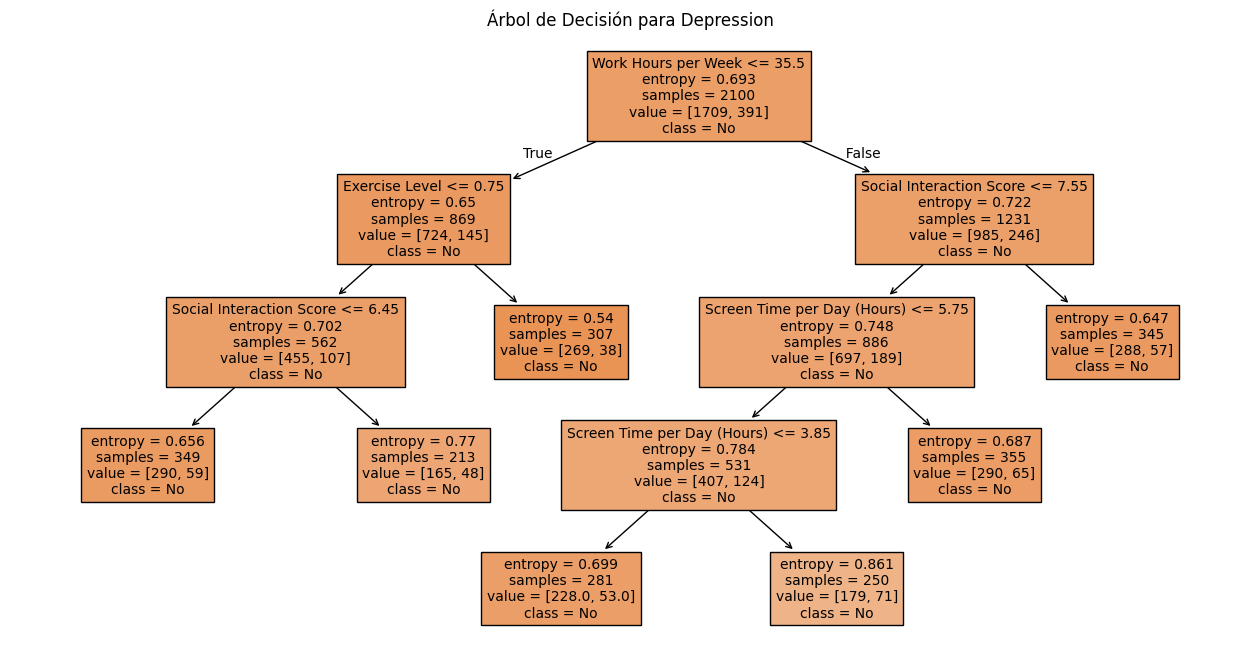

🌳 Árbol para: Anxiety — Accuracy: 0.80
[[718   0]
 [182   0]]


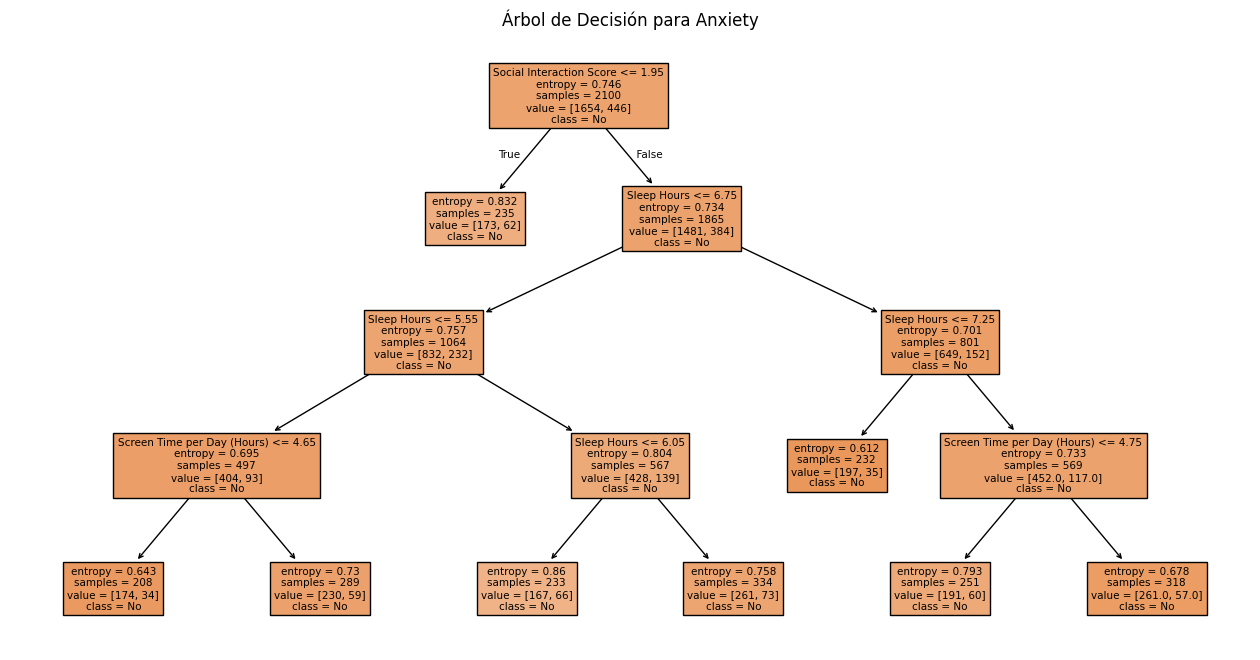

🌳 Árbol para: PTSD — Accuracy: 0.80
[[717   0]
 [183   0]]


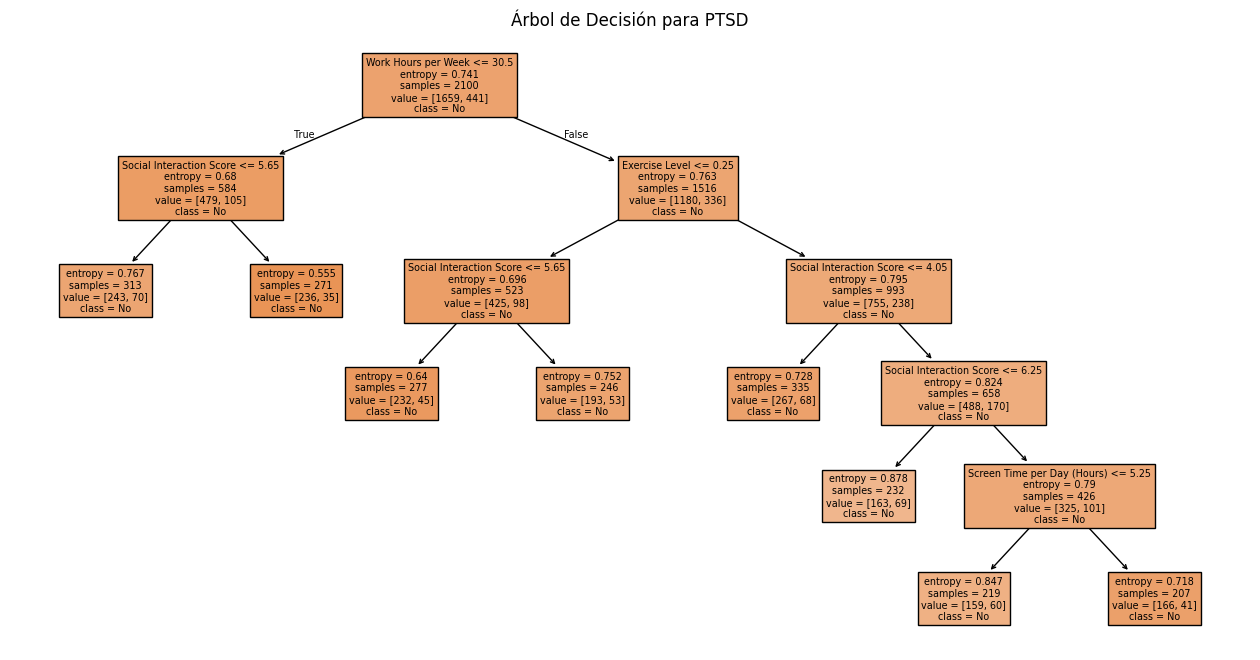

🌳 Árbol para: Bipolar — Accuracy: 0.80
[[719   0]
 [181   0]]


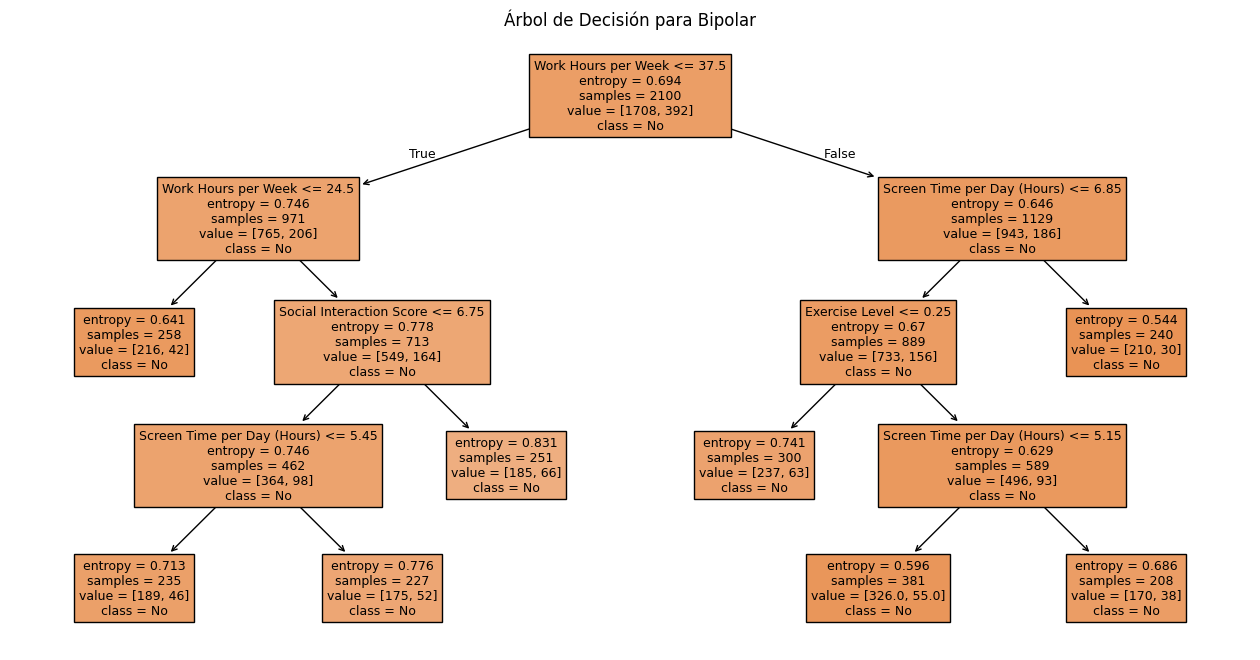

In [9]:
for condicion in ['Depression', 'Anxiety', 'PTSD', 'Bipolar']:
    entrenar_arbol(df, condicion, features)
